<a href="https://colab.research.google.com/github/RealMyeong/AIFFELTHON/blob/main/JinMyeong/train_data_EDA__1%26spell_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11.12(토) 훈련 데이터 EDA를 진행

In [50]:
# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [51]:
# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [52]:
# # Mecab 설치
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [53]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/label_train_data.csv')

In [55]:
data.head()

,class,conversation,labelling,label_sentence,cleaned_sentence
0,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,"1,2,1,2,1,2,1,2,1,2",1:길동씨 이번에 이것좀 처리해요\n2:이거 제가 한게 아닌데요\n1:팀에서 내가 ...,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...
1,기타 괴롭힘 대화,야 너 앞니 왜 그렇게 튀어나왔냐?\n 태어날때부터 그랬어 물어보지마.\n 아 그럼...,"1,2,1,2,1,2,1,2,1,1,1,2,1,1",1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날때부터 그랬어 물어보지마.\n1:...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날때부터 그랬어 물어보지마.\n아 그럼 태...
2,갈취 대화,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n 미안 나 오늘은 진짜 돈이 없...,"1,2,1,2,1,2,1,2,1,2",1:원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n2:미안 나 오늘은 진짜 돈...,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n미안 나 오늘은 진짜 돈이 없어...
3,갈취 대화,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,"1,2,1,2,1,2,1,2,1,2",1:너 저번에 술먹은 날 기억해?\n2:아니 왜?\n1:야 300만원만 가져와.\n...,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....
4,협박 대화,너 또 내말 무시하냐?\n 이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 ...,"1,1,2,1,1,2,1,2,1,1",1:너 또 내말 무시하냐?\n1:이새끼 널 좆으로 보나본데?\n2:아냐 진짜 시간이...,너 또 내말 무시하냐?\n이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 미...


In [56]:
data.tail()

,class,conversation,labelling,label_sentence,cleaned_sentence
3908,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,"1,2,1,2,1,2,1,2,1,2,1",1:준하야 넌 대가리가 왜이렇게 크냐?\n2:내 머리가 뭐.\n1:밥먹으면 대가리만...,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3909,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,"1,2,1,2,1,2,1,2,1,2",1:내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n2...,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3910,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,"1,1,1,1,1,1,1,1,1,1,2",1:나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n1:왜 그래. ...,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3911,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,"1,2,1,2,1,2,1,2,1,2",1:누구맘대로 여기서 장사하래?\n2:이게 무슨일입니까?\n1:남의 구역에서 장사하...,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...
3912,직장 내 괴롭힘 대화,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...,"1,2,1,2,1,2,1,2,1,2",1:희정씨\n2:네?\n1:주말에 시간이 넘쳐나나봐\n2:갑자기 왜그러세요?\n1:...,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...


In [57]:
len(data)

3913

## 1. 대화의 공격성 유형에 따라서 분리

1. 협박
2. 갈취
3. 직장 내 괴롭힘
4. 기타 괴롭힘

In [58]:
data.columns

Index(['class', 'conversation', 'labelling', 'label_sentence',
       'cleaned_sentence'],
      dtype='object')

In [59]:
data['class'].value_counts()

기타 괴롭힘 대화      1065
갈취 대화           978
직장 내 괴롭힘 대화     975
협박 대화           895
Name: class, dtype: int64

In [60]:
# 협박 대화
threat = data[data['class']=='협박 대화']

# 갈취 대화
extort = data[data['class']=='갈취 대화']

# 직장 내 괴롭힘
workplace_bull = data[data['class']=='직장 내 괴롭힘 대화']

# 기타 괴롭힘
other_bull = data[data['class']=='기타 괴롭힘 대화']

In [61]:
print(f'협박 대화 개수 : {len(threat)}')
print(f'갈취 대화 개수 : {len(extort)}')
print(f'직장 내 괴롭힘 대화 개수 : {len(workplace_bull)}')
print(f'기타 괴롭힘 대화 개수 : {len(other_bull)}')

협박 대화 개수 : 895
갈취 대화 개수 : 978
직장 내 괴롭힘 대화 개수 : 975
기타 괴롭힘 대화 개수 : 1065


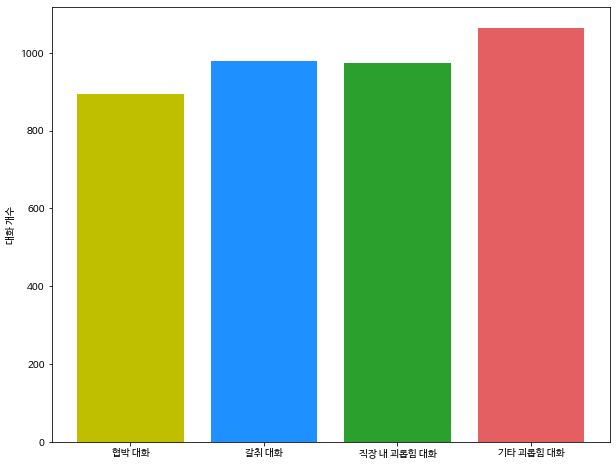

In [62]:
plt.figure(figsize=(10,8))
plt.bar(x = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화'], width = 0.8, height = [len(threat), len(extort), len(workplace_bull), len(other_bull)], color=['y', 'dodgerblue', 'C2', '#e35f62'])
plt.ylabel('대화 개수')
plt.show()

- 전처리 후 토큰화

In [63]:
from konlpy.tag import Mecab
mecab = Mecab()

sen_1 = list(threat['conversation'])[1]
sen_2 = list(threat['cleaned_sentence'])[1]
sen_3 = list(threat['label_sentence'])[1]

In [64]:
print(mecab.morphs(sen_1))
print(mecab.morphs(sen_2))
print(mecab.morphs(sen_3))

['너', '내', '지갑', '에', '손', '댔', '지', '?', '내', '돈', '내놔', '.', '아니', '에요', '.', '봐', '봐', '.', '돈', '여기', '있', '잖아', '.', '속옷', '속', '에', '숨겨', '놓', '으면', '못', '찾', '을', '줄', '알', '았', '어', '?', '그거', '제', '돈', '이', '에요', '.', '어디', '서', '개', '구라', '를', '쳐', '?', '맞', '아야', '정신', '차리', '지', '?', '이거', '습관', '성', '이', '야', '.', '저', '도벽', '없', '어요', '.', '어라', '?', '이딴', '식', '으로', '나오', '겟', '다', '?', '너', '정신', '머리', '가', '글러', '먹', '었', '구나', '?', '죄송', '해요', '.', '일', '로와', '.', '너', '죽여', '버릴', '거', '야', '.', '죽', '어야', '정신', '차리', '지', '.', '정신', '차릴', '게', '요', '.', '죄송', '해요', '.']
['너', '내', '지갑', '에', '손', '댔', '지', '?', '내', '돈', '내놔', '.', '아니', '에요', '.', '봐', '봐', '.', '돈', '여기', '있', '잖아', '.', '속옷', '속', '에', '숨겨', '놓', '으면', '못', '찾', '을', '줄', '알', '았', '어', '?', '그거', '제', '돈', '이', '에요', '.', '어디', '서', '개', '구라', '를', '쳐', '?', '맞', '아야', '정신', '차리', '지', '?', '이거', '습관', '성', '이', '야', '.', '저', '도벽', '없', '어요', '.', '어라', '?', '이딴', '식', '으로', '나오', '겟', '다', '?',

'conversation' 컬럼 기준으로 토큰화해서 확인하면 될 것 같음.

대화 유형마다 각각 토큰화해서 저장해주는 함수를 정의해서 EDA진행.

In [65]:
# 한글 불용어 리스트 생성
ko_stopword = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/한글불용어.csv')
ko_stopword.head()

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고


In [66]:
stop_word = ''
for i in ko_stopword['불용어']:
  stop_word = stop_word + i + ' '

stop_word = stop_word.strip()
stop_word_list = list(set(stop_word.split()))
stop_word_list

['붕붕',
 '하기는한데',
 '여보시오',
 '즈음하여',
 '외에도',
 '정도의',
 '그렇지만',
 '두번째로',
 '삼',
 '까닭으로',
 '로부터',
 '지경이다',
 '갖고말하자면',
 '응',
 '여섯',
 '약간',
 '말하자면',
 '따름이다',
 '헉헉',
 '네',
 '앗',
 '만일',
 '각자',
 '불구하고',
 '하든지',
 '없다',
 '좀',
 '아니다',
 '그래서',
 '이천구',
 '와',
 '전자',
 '해도된다',
 '기타',
 '다섯',
 '비추어',
 '앞에서',
 '어찌하여',
 '했어요',
 '어찌됏어',
 '하고있었다',
 '어느곳',
 '언젠가',
 '와아',
 '이렇구나',
 '팔',
 '얼마',
 '오로지',
 '팍',
 '주저하지',
 '지만',
 '한적이있다',
 '어기여차',
 '않으면',
 '응당',
 '매번',
 '한하다',
 '아니라',
 '요만한걸',
 '하도다',
 '않다면',
 '따라',
 '고로',
 '해요',
 '한항목',
 '그럼에도',
 '따라서',
 '하겠는가',
 '인하여',
 '하도록시키다',
 '중의하나',
 '봐',
 '쓰여',
 '구',
 '이러이러하다',
 '흐흐',
 '저것만큼',
 '한',
 '조금',
 '안다',
 '때문에',
 '더불어',
 '다음에',
 '헐떡헐떡',
 '하하',
 '둥둥',
 '즉',
 '아무도',
 '어째서',
 '로',
 '하게하다',
 '허허',
 '그렇지않으면',
 '휴',
 '다시말하면',
 '훨씬',
 '그',
 '따르는',
 '하여금',
 '어떤것들',
 '이와같다면',
 '삐걱',
 '일곱',
 '과',
 '여',
 '시간',
 '해야한다',
 '비록',
 '어찌됏든',
 '의지하여',
 '되다',
 '하자마자',
 '관련이',
 '다만',
 '기대여',
 '등',
 '뚝뚝',
 '가서',
 '더욱더',
 '하도록하다',
 '곧',
 '낼',
 '아홉',
 '남짓',
 '헉',
 '만',
 '누구',
 '당신',
 '그런',


In [67]:
def build_corpus(sen):

  mecab = Mecab()

  corpus = mecab.morphs(sen)
  corpus = [x for x in corpus if not x in stop_word_list]

  return corpus

In [68]:
# 협박 대화 말뭉치
threat_corpus = [build_corpus(sen) for sen in threat['conversation']]

# 갈취 대화 말뭉치
extort_corpus = [build_corpus(sen) for sen in extort['conversation']]

# 직장 내 괴롭힘 대화 말뭉치
workplace_bull_corpus = [build_corpus(sen) for sen in workplace_bull['conversation']]

# 기타 괴롭힘 대화 말뭉치
other_bull_corpus = [build_corpus(sen) for sen in other_bull['conversation']]

In [69]:
threat_corpus[1]

['내',
 '지갑',
 '손',
 '댔',
 '지',
 '?',
 '내',
 '돈',
 '내놔',
 '.',
 '에요',
 '.',
 '.',
 '돈',
 '있',
 '잖아',
 '.',
 '속옷',
 '속',
 '숨겨',
 '놓',
 '으면',
 '못',
 '찾',
 '았',
 '?',
 '그거',
 '돈',
 '에요',
 '.',
 '서',
 '개',
 '구라',
 '쳐',
 '?',
 '맞',
 '정신',
 '차리',
 '지',
 '?',
 '이거',
 '습관',
 '성',
 '.',
 '도벽',
 '없',
 '어요',
 '.',
 '어라',
 '?',
 '이딴',
 '식',
 '나오',
 '겟',
 '다',
 '?',
 '정신',
 '머리',
 '글러',
 '먹',
 '었',
 '구나',
 '?',
 '죄송',
 '.',
 '로와',
 '.',
 '죽여',
 '버릴',
 '거',
 '.',
 '죽',
 '어야',
 '정신',
 '차리',
 '지',
 '.',
 '정신',
 '차릴',
 '게',
 '요',
 '.',
 '죄송',
 '.']

불용어를 없애주는 작업을 진행했음 

불용어를 없애는 게 도움이 더 될거라 생각했지만 `'맞아야' -> '맞'+'아야' -> 불용어 '아야'삭제 -> '맞'` 같이 바뀌는 경우가 있어서 오히려 의미전달은 더 힘들어보임.

분석을 어떤식으로 해야할지도 고민해봐야겠음. 

- 대화 유형별 길이 분포 확인

문장의 최단 길이 :  21
문장의 최장 길이 :  294
문장의 평균 길이 :  88


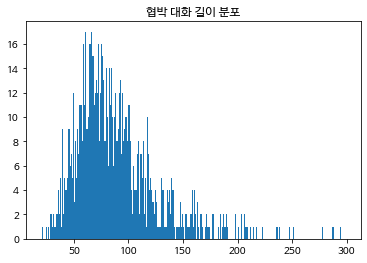

In [70]:
# 협박 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in threat_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(threat_corpus))

sentence_length = [len(x) for x in threat_corpus]

plt.hist(sentence_length, bins = np.arange(20, 300))
plt.title('협박 대화 길이 분포')
plt.show()

- 단어의(토큰) 빈도 확인

<BarContainer object of 30 artists>

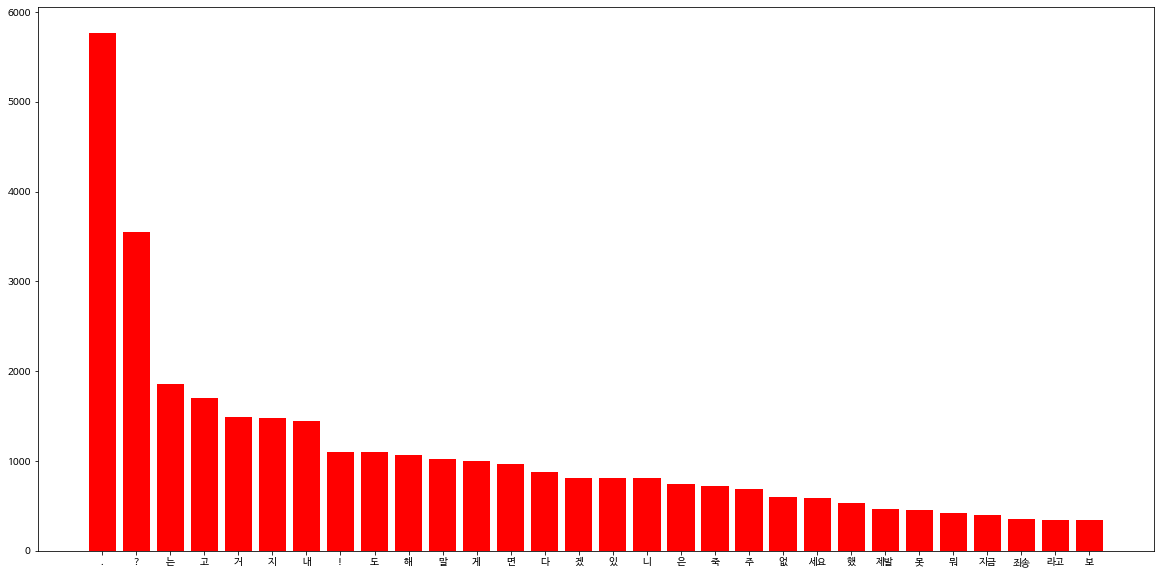

In [71]:
from collections import defaultdict

token = []

for x in threat_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

토큰 빈도수를 확인해보면 의미를 도출하기가 너무 힘들어보임.

여기서 EDA를 더 진행하는 건 의미가 없을 것 같아서 다른 방법으로 토큰화를 진행하기로함.

- 맞춤법 검사기

다른 방법의 토큰화 과정으로 생각한 것은 아래와 같음.
1. 먼저 맞춤법 검사기를 사용해서 모든 대화의 맞춤법을 검사함
2. 수정된 문장을 이용하여 단순하게 띄어쓰기 단위로 토큰화하여 빈도수를 측정

In [72]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
cd '/content/drive/MyDrive/AIFFELTHON/맞춤법검사'

/content/drive/MyDrive/AIFFELTHON/맞춤법검사


In [74]:
!git clone https://github.com/ssut/py-hanspell.git

fatal: destination path 'py-hanspell' already exists and is not an empty directory.


In [75]:
cd '/content/drive/MyDrive/AIFFELTHON/맞춤법검사/py-hanspell'

/content/drive/MyDrive/AIFFELTHON/맞춤법검사/py-hanspell


In [76]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing py_hanspell.egg-info/PKG-INFO
writing dependency_links to py_hanspell.egg-info/dependency_links.txt
writing requirements to py_hanspell.egg-info/requires.txt
writing top-level names to py_hanspell.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'py_hanspell.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/spell_checker.py -> build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/response.py -> build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/constants.py -> bu

In [77]:
from hanspell import spell_checker
 
result = spell_checker.check('안녕 하세요. \n저는 한국인 입니다.')
 
print(result.as_dict())

{'result': True, 'original': '안녕 하세요. \n저는 한국인 입니다.', 'checked': '안녕하세요. 저는 한국인입니다.', 'errors': 2, 'words': OrderedDict([('안녕하세요.', 2), ('<br>저는', 0), ('<br><green>한국인입니다.', 0)]), 'time': 0.8171346187591553}


In [78]:
result = spell_checker.check(data['cleaned_sentence'][1])

In [79]:
result.as_dict()['checked']+'\n'

'야 너 앞니 왜 그렇게 튀어나왔냐?태어날 때부터 그랬어 물어보지 마.아 그럼 태어날 때부터 못 생기 거네?괴롭히지 마 제발아니 너는 내가 말만 하면 괴롭혔다고 한다?혼자 있게 해줘제 혼자 있는 거 같아서 말 걸어줬더니만 나쁜 사람 만드네 그래놓고 왕따시켰다고 말하지나 마 진짜 성격이 왜 그따위야? 가정교육 잘못 받았냐부모님은 건드리지 마어쭈 발끈한다 지도 자식이라 이거지얘 왜 우냐?아니 몰라 제 혼자 갑자기 화내제발 혼자 있게 해줘 내버려 둬이거 왜 또 제 혼자 감성적이냐? 애니 그만 보라 했지완전 얘 코미디언 아니냐\n'

In [80]:
spell_checker.check(data['label_sentence'][1]).as_dict()['checked']

'1:야 너 앞니 왜 그렇게 튀어나왔냐?2:태어날 때부터 그랬어 물어보지 마.1:아 그럼 태어날 때부터 못 생기 거네?2:괴롭히지 마 제발1:아니 너는 내가 말만 하면 괴롭혔다고 한다?2:혼자 있게 해줘1:제 혼자 있는 거 같아서 말 걸어줬더니만 나쁜 사람 만드네 그래놓고 왕따시켰다고 말하지나 마 진짜 성격이 왜 그따위야? 가정교육 잘못 받았냐2:부모님은 건드리지 마1:어쭈 발끈한다 지도 자식이라 이거지1:얘 왜 우냐?1:아니 몰라 제 혼자 갑자기 화내2:제발 혼자 있게 해줘 내버려 둬1:이거 왜 또 제 혼자 감성적이냐? 애니 그만 보라 했지1:완전 얘 코미디언 아니냐'

맞춤법 검사기가 잘 작동하는 것을 보았으니 이제 데이터 전체에대해서 맞춤법 검사를 진행해줌

In [81]:
def spell_check(sen):

  sen_list = sen.split('\n')
  checked_list = []
  
  for i in sen_list:
    checked = spell_checker.check(i).as_dict()['checked']
    checked_list.append(checked)
  
  checked_sen = '\n'.join(checked_list)
  return checked_sen

In [82]:
print(spell_check(data['label_sentence'][1]))

1:야 너 앞니 왜 그렇게 튀어나왔냐?
2:태어날 때부터 그랬어 물어보지 마.
1:아 그럼 태어날 때부터 못 생기 거네?
2:괴롭히지 마 제발
1:아니 너는 내가 말만 하면 괴롭혔다고 한다?
2:혼자 있게 해줘
1:제 혼자 있는 거 같아서 말 걸어줬더니만 나쁜 사람 만드네 그래놓고 왕따시켰다고 말하지나 마 진짜 성격이 왜 그따위야? 가정교육 잘못 받았냐
2:부모님은 건드리지 마
1:어쭈 발끈한다 지도 자식이라 이거지
1:얘 왜 우냐?
1:아니 몰라 제 혼자 갑자기 화내
2:제발 혼자 있게 해줘 내버려 둬
1:이거 왜 또 제 혼자 감성적이냐? 애니 그만 보라 했지
1:완전 얘 코미디언 아니냐


In [83]:
data['spell_checked_conversation'] = data['cleaned_sentence'].apply(lambda x : spell_check(x))

In [84]:
data.to_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/train_spell_check.csv', index = False)

In [85]:
data.head()

,class,conversation,labelling,label_sentence,cleaned_sentence,spell_checked_conversation
0,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,"1,2,1,2,1,2,1,2,1,2",1:길동씨 이번에 이것좀 처리해요\n2:이거 제가 한게 아닌데요\n1:팀에서 내가 ...,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,길동 씨 이번에 이것 좀 처리해요\n이거 제가 한 게 아닌데요\n팀에서 내가 네가 ...
1,기타 괴롭힘 대화,야 너 앞니 왜 그렇게 튀어나왔냐?\n 태어날때부터 그랬어 물어보지마.\n 아 그럼...,"1,2,1,2,1,2,1,2,1,1,1,2,1,1",1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날때부터 그랬어 물어보지마.\n1:...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날때부터 그랬어 물어보지마.\n아 그럼 태...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날 때부터 그랬어 물어보지 마.\n아 그럼...
2,갈취 대화,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n 미안 나 오늘은 진짜 돈이 없...,"1,2,1,2,1,2,1,2,1,2",1:원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n2:미안 나 오늘은 진짜 돈...,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n미안 나 오늘은 진짜 돈이 없어...,원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n미안 나 오늘은 진짜 돈이...
3,갈취 대화,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,"1,2,1,2,1,2,1,2,1,2",1:너 저번에 술먹은 날 기억해?\n2:아니 왜?\n1:야 300만원만 가져와.\n...,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,너 저번에 술 먹은 날 기억해?\n아니 왜?\n야 300만 원만 가져와.\n뭔 소리...
4,협박 대화,너 또 내말 무시하냐?\n 이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 ...,"1,1,2,1,1,2,1,2,1,1",1:너 또 내말 무시하냐?\n1:이새끼 널 좆으로 보나본데?\n2:아냐 진짜 시간이...,너 또 내말 무시하냐?\n이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 미...,너 또 내말 무시하냐?\n이 새끼 널 좆으로 보나 본데?\n아냐 진짜 시간이 없었어...
